<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/imputers_scalers_binary_classifiers_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote Binary Classification

Data: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

Metrics and scoring: quantifying the quality of predictions (classification and regression):
https://scikit-learn.org/stable/modules/model_evaluation.html

#### Palette

Source: https://coolors.co/

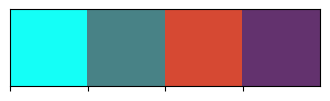

In [ ]:
import seaborn as sns
palette = ['#14FFF7','#488286','#D64933','#63326E']
sns.palplot(palette)

### Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import and cleaning data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SPB_PU_Ogul/data/bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

Check for duplicates

In [ ]:
df.duplicated().sum()

24

Let's keep them for now

In [ ]:
#df = df.drop_duplicates()

Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1371 non-null   float64
 1   Skewness  1366 non-null   float64
 2   Curtosis  1364 non-null   float64
 3   Entropy   1368 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Data types are OK, but there are missing values:

In [ ]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Variance    1
Skewness    6
Curtosis    8
Entropy     4
dtype: int64


We will deal with them later.

## EDA

In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1371.000000,1366.000000,1364.000000,1368.000000,1372.000000
mean,0.430719,1.917430,1.404756,-1.194846,0.444606
std,2.841603,5.865121,4.318840,2.102723,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.714400,-1.629375,-2.426050,0.000000
50%,0.495710,2.319650,0.616630,-0.586650,0.000000
75%,2.814650,6.813600,3.257225,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Scatter plot matrix

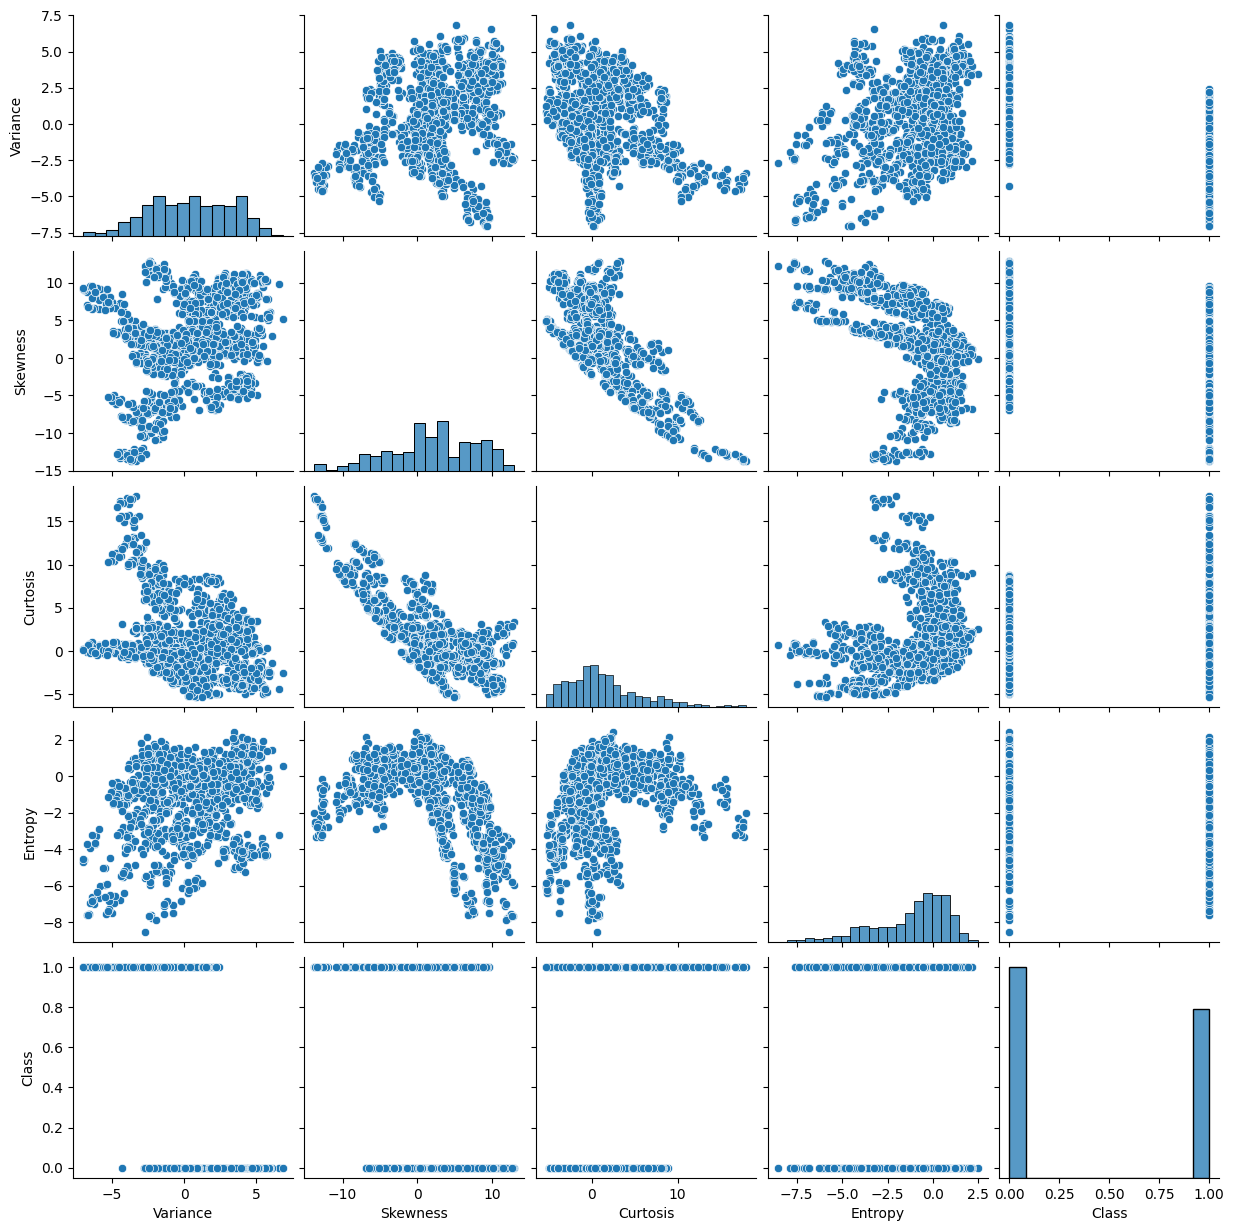

In [ ]:
sns.pairplot(df)
plt.show()

Correlation

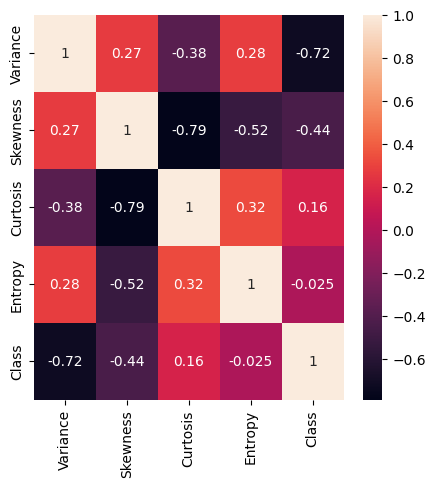

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True),  annot=True)
plt.show()

Variance affects the most

Label variable

In [ ]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

The dataset is well-balanced in terms of classes of the label.

Histograms of feature distribution for 0 and 1 classes

In [ ]:
for col_name in df.columns:
  fig = px.histogram(df,
                   x=col_name,
                   nbins = 30,
                   color = "Class",
                   color_discrete_sequence= [palette[0],palette[1]],
                   barmode="overlay",
                   marginal = 'box',
                   title = col_name)
  fig.show()


Variance should be the most powerfull predictor

## Splitting the dataset into train and test data

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True,random_state=27)  # 80% training, 20% testing

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1097, 4) (1097,)
(275, 4) (275,)


## Dealing with missing values. Imputers

consider encoding categorical features before using imputation

### SimpleImputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Pros:
Easy and fast.
Works well with small numerical datasets.
Cons:
Doesn’t factor the correlations between features. It only works on the column level.
Will give poor results on encoded categorical features (do NOT use it on categorical features).
Not very accurate.
Doesn’t account for the uncertainty in the imputations.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean') # Create a SimpleImputer with a strategy (e.g., mean, median, most_frequent)

In [ ]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# For dataset for reasons other than ML tasks
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns) #imputation removed column names; put them back

### KNNImputer

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).
Cons:
Computationally expensive. KNN works by storing the whole training dataset in memory.
K-NN is quite sensitive to outliers in the data (unlike SVM)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=2) # Create a KNNImputer with the desired number of neighbors (default is 5)

In [ ]:
X_train_imputed_knn = imputer.fit_transform(X_train)
X_test_imputed_knn = imputer.transform(X_test)

In [ ]:
# For dataset for reasons other than ML tasks
#df_imputed_knn = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### KNNImputer (impute.imputation.cs)

In [ ]:
#!pip install impyute

In [ ]:
from impyute.imputation.cs import fast_knn

In [ ]:
# Perform imputation using fast_knn
# Note: fast_knn expects NumPy arrays, so we convert DataFrames to NumPy arrays
X_train_imputed_knn2 = fast_knn(X_train.values, k=30)
#X_test_imputed_knn2 = fast_knn(X_test.values, k=30)

In [ ]:
# Convert the imputed arrays back to DataFrames (if needed)
X_train_imputed_knn2_df = pd.DataFrame(X_train_imputed_knn2, columns=X_train.columns)
#X_test_imputed_knn2_df = pd.DataFrame(X_test_imputed_knn2, columns=X_test.columns)

# Now, X_train_imputed_df and X_test_imputed_df contain the imputed DataFrames

### Mice (impute.imputation.cs)

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. mice: Multivariate Imputation by Chained Equations in R
https://www.machinelearningplus.com/machine-learning/mice-imputation/

In [ ]:
from impyute.imputation.cs import mice

In [ ]:
# Perform imputation using mice
# Note: mice expects NumPy arrays, so we convert DataFrames to NumPy arrays
X_train_imputed_mice = mice(X_train.values)
#X_test_imputed_mice = mice(X_test.values)

## Scaling

##### Equations

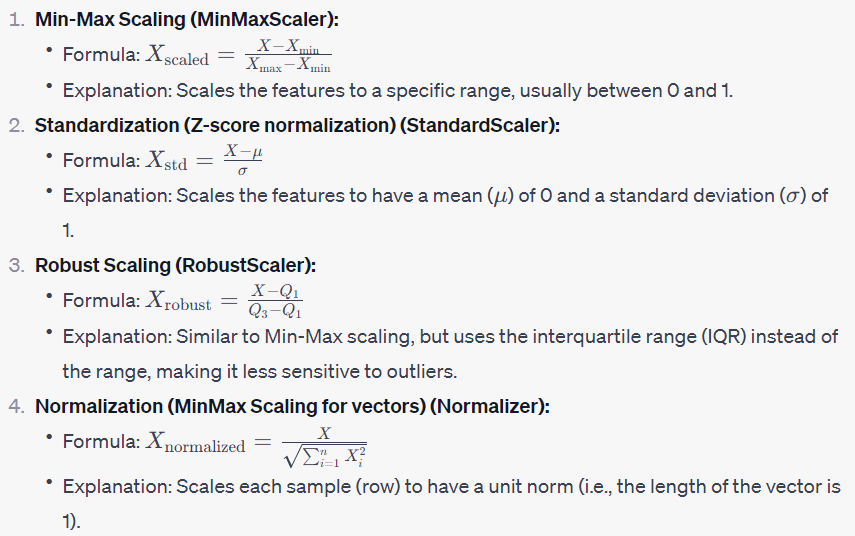

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.
This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.
When normalizing the test set, one should apply the normalization parameters previously obtained from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would produce wrong predictions.

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X1_train_scaled = scaler.fit_transform(X_train_imputed)
X1_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
pd.DataFrame(X1_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3
count,1097.00,1097.00,1097.00,1097.00
mean,0.54,0.59,0.29,0.65
std,0.20,0.22,0.18,0.20
min,0.00,0.00,0.00,0.00
25%,0.38,0.45,0.16,0.53
50%,0.54,0.60,0.26,0.71
75%,0.71,0.77,0.37,0.80
max,1.00,1.00,1.00,1.00


### Standart scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X2_train_scaled = scaler.fit_transform(X_train_imputed)
X2_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
pd.DataFrame(X2_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3
count,1097.00,1097.00,1097.00,1097.00
mean,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-2.65,-2.67,-1.56,-3.21
25%,-0.78,-0.62,-0.69,-0.60
50%,-0.02,0.05,-0.17,0.29
75%,0.85,0.84,0.43,0.76
max,2.27,1.89,3.86,1.75


### Robust scaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
X3_train_scaled = scaler.fit_transform(X_train_imputed)
X3_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
pd.DataFrame(X3_train_scaled).describe().round(2) # Convert back to DataFrame to apply describe()

,0,1,2,3
count,1097.00,1097.00,1097.00,1097.00
mean,0.01,-0.03,0.15,-0.21
std,0.62,0.68,0.90,0.74
min,-1.62,-1.85,-1.25,-2.58
25%,-0.47,-0.46,-0.46,-0.65
50%,0.00,0.00,0.00,0.00
75%,0.53,0.54,0.54,0.35
max,1.41,1.26,3.62,1.07


Let's choose MinMax scaler

In [ ]:
X_train, X_test = X1_train_scaled, X1_test_scaled

## Classification

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create and train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Metrics

Metrics:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- Accuracy = (TP + TN) / (TP + FP + TN + FN)
- F1-score = 2 * ((Precision* Recall) / (Precision + Recall))

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.96
Precision: 0.95
Recall: 0.96
F1 Score: 0.95

Confusion Matrix:
 [[153   6]
 [  5 111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       159
           1       0.95      0.96      0.95       116

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



#### Classification report

1. **Precision:**
   - Precision is the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of the positive predictions.
2. **Recall (Sensitivity):**
   - Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the ability of the classifier to capture all the positive instances.
3. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of precision and recall.
4. **Support:**
   - Support is the number of actual occurrences of the class in the specified dataset. It represents the number of instances for each class.
5. **Accuracy:**
   - Overall accuracy is usually provided at the bottom of the report. It represents the ratio of correctly predicted instances to the total number of instances.

```plaintext
             precision    recall  f1-score   support

    Class 0       0.80      0.85      0.82        50
    Class 1       0.75      0.68      0.71        30
    Class 2       0.90      0.92      0.91        70

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.83       150
```

In this example, the classification report provides precision, recall, and F1-score for each class (Class 0, Class 1, Class 2) along with the support for each class. The macro and weighted averages are also provided, offering an overall assessment of the model's performance.

In a multi-class classification scenario with three classes (Class 0, Class 1, Class 2), the recall for each class is given by the following formula. These formulas provide the recall for each individual class, giving insight into how well the classifier is performing in terms of capturing positive instances for each class.

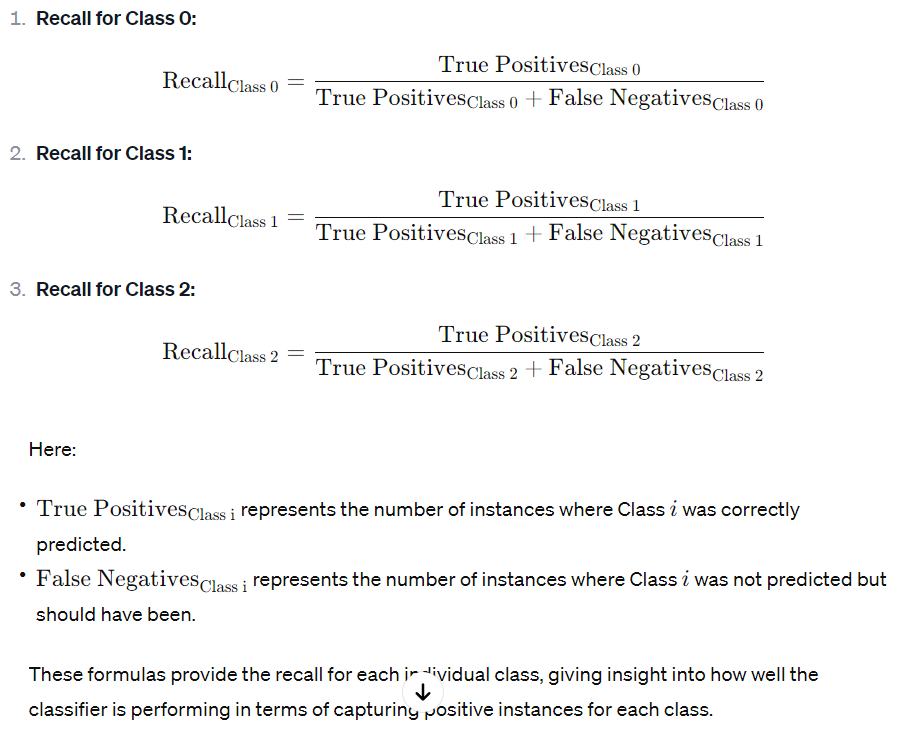

#### Confusion matrix

https://en.wikipedia.org/wiki/Confusion_matrix

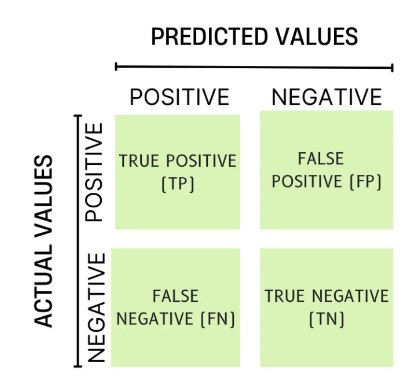

**sklearn.metrics.confusion_matrix**
- cm = confusion_matrix(y, y_pred)
- {'tn': cm[0, 0], 'fp': cm[0, 1],
- 'fn': cm[1, 0], 'tp': cm[1, 1]}

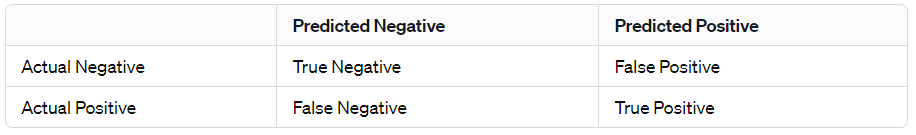

More than 2 classes

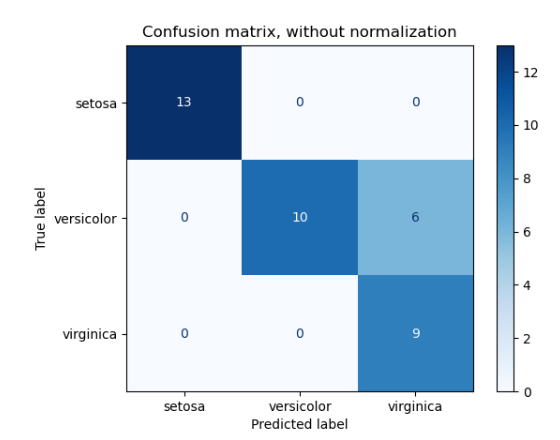

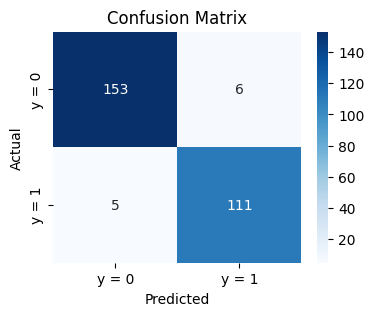

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['y = 0','y = 1'], yticklabels=['y = 0','y = 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### ROC AUC

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

AUC-ROC stands for "Area Under the Receiver Operating Characteristic curve." It is a performance metric used for binary classification problems, particularly in machine learning and statistics. The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various thresholds.

Here's a breakdown of the key components:

1. **Receiver Operating Characteristic (ROC) Curve:**
   - The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values. Each point on the curve represents a different threshold setting.

2. **Area Under the Curve (AUC):**
   - AUC-ROC quantifies the overall performance of a classification model across various thresholds. The AUC is the area under the ROC curve. It ranges from 0 to 1, where a higher AUC indicates better discrimination ability of the model.
   - A model with an AUC of 0.5 has no discriminatory power (similar to random guessing), while a model with an AUC of 1.0 has perfect discriminatory power.

3. **Interpretation of AUC-ROC:**
   - AUC-ROC is often interpreted as the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. In other words, it measures the model's ability to distinguish between the positive and negative classes.

4. **Perfect Model and Random Model:**
   - A perfect model would have an AUC-ROC of 1.0, indicating that it achieves a true positive rate of 1 and a false positive rate of 0 across all possible thresholds.
   - A random model would have an AUC-ROC of 0.5, indicating that its performance is no better than random chance.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

In [ ]:
# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

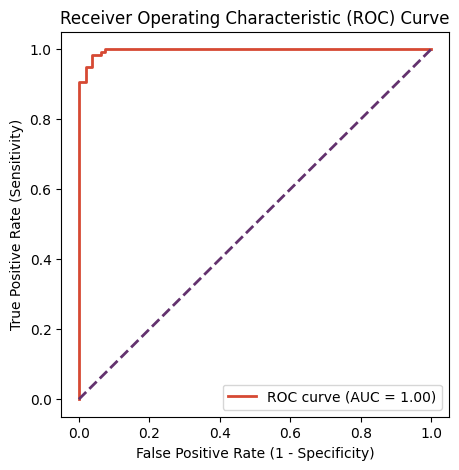

In [ ]:
# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color=palette[2], lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_roc_score))
plt.plot([0, 1], [0, 1], color=palette[3], lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

##### Evaluation metrics

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.98

Confusion Matrix:
 [[157   2]
 [  3 113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.98      0.97      0.98       116

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

##### Evaluation metrics

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.99
Precision: 0.98
Recall: 0.99
F1 Score: 0.99

Confusion Matrix:
 [[157   2]
 [  1 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.98      0.99      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Create and train the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

##### Evaluation metrics

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0
Precision: 0.99
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[158   1]
 [  0 116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       159
           1       0.99      1.00      1.00       116

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create and train the Naive Bayes model (Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

##### Evaluation metrics

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.82
Precision: 0.81
Recall: 0.74
F1 Score: 0.77

Confusion Matrix:
 [[139  20]
 [ 30  86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       159
           1       0.81      0.74      0.77       116

    accuracy                           0.82       275
   macro avg       0.82      0.81      0.81       275
weighted avg       0.82      0.82      0.82       275



### Gradient Boosting Models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

##### Evaluation metrics

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.99
Precision: 0.98
Recall: 1.0
F1 Score: 0.99

Confusion Matrix:
 [[157   2]
 [  0 116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       159
           1       0.98      1.00      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### Support Vector Machine Classifier (SVC)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create and train the SVM model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1 Score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[159   0]
 [  0 116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       116

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Prediction

In [ ]:
data = [[1.565,2.1539,44.457,1.99532]]
df = pd.DataFrame(data, columns = ['Variance', 'Skewness','Curtosis','Entropy'])
df

,Variance,Skewness,Curtosis,Entropy
0,1.565,2.1539,44.457,1.99532


In [ ]:
prediction = model.predict(df)

prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



array([1])